In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
month = pd.read_csv(r'C:\Users\yun liu\Desktop\LWBProject\Month.csv',low_memory=False)

In [2]:
model=pd.DataFrame() # make a new dataframe for simple attributes.
month['PrimaryKey'] = month.index
pkey=month.iloc[:,-1]

In [3]:
data=month.filter(regex=r'^(_|occurreddate_|rowtype_|medc_|status_)', axis=1)
ckey=month.iloc[:,0:2]
dataset=data.loc[:,~data.columns.str.contains('lag02|lag03|lag04|lag05|lag06|_hash|_id')]
dataset=dataset.copy()

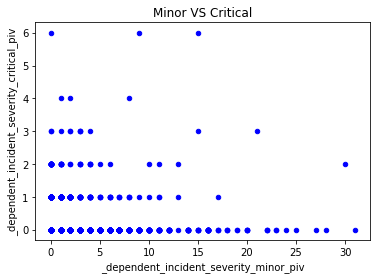

In [4]:
data1=dataset.filter(regex=r'^_', axis=1)
data1m=data1.iloc[:,1:4]
data1m['key']=pkey
data1m.plot.scatter(x='_dependent_incident_severity_minor_piv', y='_dependent_incident_severity_critical_piv',color='Blue',title='Minor VS Critical')

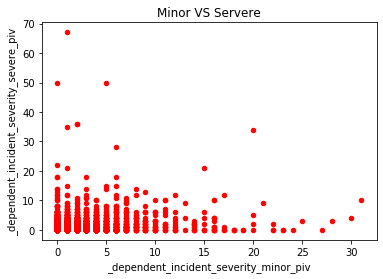

In [5]:
data1m.plot.scatter(x='_dependent_incident_severity_minor_piv', y='_dependent_incident_severity_severe_piv',color='Red',title='Minor VS Servere')

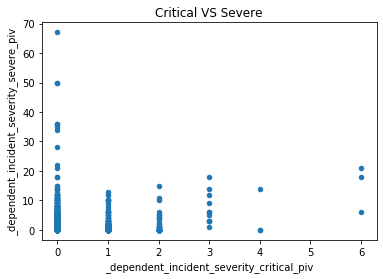

In [6]:
data1m.plot.scatter(x='_dependent_incident_severity_critical_piv', y='_dependent_incident_severity_severe_piv',title='Critical VS Severe')

In [7]:
data1m.iloc[:,0:3].corr()

,_dependent_incident_severity_critical_piv,_dependent_incident_severity_minor_piv,_dependent_incident_severity_severe_piv
_dependent_incident_severity_critical_piv,1.000000,0.138081,0.177137
_dependent_incident_severity_minor_piv,0.138081,1.000000,0.306229
_dependent_incident_severity_severe_piv,0.177137,0.306229,1.000000


In [8]:
response=[]
numR=data1m.shape[0]
con=0
coun=0
for i in range(numR):
    severe=data1m.loc[i,'_dependent_incident_severity_severe_piv']
    critical=data1m.loc[i,'_dependent_incident_severity_critical_piv']
    if severe>0 or critical>0:
        response.append(1)
        coun+=1
    else:
        response.append(0)
        con+=1
model['Incident']=response
model['Incident'].value_counts()

0    119707
1      4586
Name: Incident, dtype: int64

Now I am moving to the data which column name start with "occurreddate".

In [9]:
data2=dataset.filter(regex=r'^occurreddate_', axis=1)
data2.columns

Index(['occurreddate_monthofyear', 'occurreddate_weekofyear',
       'occurreddate_dayofweek', 'occurreddate_dayofmonth',
       'occurreddate_dayofyear'],
      dtype='object')

From the column names we can know that, this columns stores the Date information, which can be treated as description.

The following data I am gone to analysis is the columns with name start at 'rowtype'

In [11]:
data3=dataset.filter(regex=r'^rowtype_', axis=1)
#data3.columns

In [12]:
data3piv=data3.filter(regex=r'_piv$', axis=1) #16 rows aggregate by one month
#data3piv.dtypes
data3piv.describe()

,rowtype_client_address_addition_piv,rowtype_rp_end_piv,rowtype_rp_start_piv,rowtype_progress_note_piv,rowtype_diagnosis_piv,rowtype_medictn_start_piv,rowtype_client_plan_start_piv,rowtype_client_plan_end_piv,rowtype_keyworker_change_piv,rowtype_reference_piv,rowtype_medictn_end_piv,rowtype_plcment_end_piv,rowtype_incident_piv,rowtype_plcment_start_piv,rowtype_program_primary_service_type_start_piv,rowtype_client_alert_start_piv
count,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000
mean,0.039914,0.003347,0.005318,5.855342,0.031450,0.022970,0.147281,0.049528,0.034604,27.861706,0.009864,0.035521,0.173912,0.045353,0.024933,0.009880
std,0.200388,0.094698,0.107767,16.578656,0.268733,0.268184,0.561807,0.386751,0.237556,8.041660,0.167614,0.276235,1.044579,0.326864,0.183380,0.100038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,10.000000,8.000000,303.000000,16.000000,18.000000,74.000000,40.000000,7.000000,93.000000,16.000000,12.000000,68.000000,13.000000,12.000000,2.000000


In [13]:
data3sum=data3.filter(regex=r'_sum_n_days$', axis=1) #16 rows aggregate by 6 month
#data3sum.dtypes
data3sum.describe()

,rowtype_client_address_addition_piv_sum_n_days,rowtype_rp_end_piv_sum_n_days,rowtype_rp_start_piv_sum_n_days,rowtype_progress_note_piv_sum_n_days,rowtype_diagnosis_piv_sum_n_days,rowtype_medictn_start_piv_sum_n_days,rowtype_client_plan_start_piv_sum_n_days,rowtype_client_plan_end_piv_sum_n_days,rowtype_keyworker_change_piv_sum_n_days,rowtype_reference_piv_sum_n_days,rowtype_medictn_end_piv_sum_n_days,rowtype_plcment_end_piv_sum_n_days,rowtype_incident_piv_sum_n_days,rowtype_plcment_start_piv_sum_n_days,rowtype_program_primary_service_type_start_piv_sum_n_days,rowtype_client_alert_start_piv_sum_n_days
count,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000
mean,0.223726,0.020491,0.031445,29.557594,0.152491,0.128781,0.809513,0.252668,0.203268,145.753948,0.054262,0.195396,0.941199,0.271131,0.234398,0.049384
std,0.429880,0.261614,0.308905,85.590193,0.592944,0.830055,1.669310,1.004500,0.570972,57.892925,0.472336,1.250731,4.694304,1.388536,0.521703,0.219731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,18.000000,14.000000,1497.000000,16.000000,39.000000,76.000000,42.000000,7.000000,549.000000,20.000000,44.000000,238.000000,44.000000,12.000000,2.000000


In [14]:
data3avg=data3.filter(regex=r'_avg_n_days$', axis=1) #16 rows aggregate by the average of 6 month 
#data3avg.dtypes
data3avg.describe()

,rowtype_client_address_addition_piv_avg_n_days,rowtype_rp_end_piv_avg_n_days,rowtype_rp_start_piv_avg_n_days,rowtype_progress_note_piv_avg_n_days,rowtype_diagnosis_piv_avg_n_days,rowtype_medictn_start_piv_avg_n_days,rowtype_client_plan_start_piv_avg_n_days,rowtype_client_plan_end_piv_avg_n_days,rowtype_keyworker_change_piv_avg_n_days,rowtype_reference_piv_avg_n_days,rowtype_medictn_end_piv_avg_n_days,rowtype_plcment_end_piv_avg_n_days,rowtype_incident_piv_avg_n_days,rowtype_plcment_start_piv_avg_n_days,rowtype_program_primary_service_type_start_piv_avg_n_days,rowtype_client_alert_start_piv_avg_n_days
count,124250.000000,124250.0,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000,124250.000000
mean,0.000105,0.0,0.000008,0.108491,0.000306,0.000113,0.000628,0.000282,0.000249,1.012346,0.000016,0.000032,0.000620,0.000145,0.000193,0.000097
std,0.010228,0.0,0.002837,0.506376,0.022336,0.011347,0.025682,0.023564,0.021417,0.112304,0.004012,0.008971,0.027056,0.013306,0.015011,0.009827
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,13.000000,3.000000,2.000000,2.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000


In [15]:
data3since=data3.filter(regex=r'_days_since$', axis=1) #16 rows 
#data3since.dtypes
data3since.describe()

,rowtype_client_address_addition_piv_days_since,rowtype_rp_end_piv_days_since,rowtype_rp_start_piv_days_since,rowtype_progress_note_piv_days_since,rowtype_diagnosis_piv_days_since,rowtype_medictn_start_piv_days_since,rowtype_client_plan_start_piv_days_since,rowtype_client_plan_end_piv_days_since,rowtype_keyworker_change_piv_days_since,rowtype_reference_piv_days_since,rowtype_medictn_end_piv_days_since,rowtype_plcment_end_piv_days_since,rowtype_incident_piv_days_since,rowtype_plcment_start_piv_days_since,rowtype_program_primary_service_type_start_piv_days_since,rowtype_client_alert_start_piv_days_since
count,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.000000,124293.00000,124293.000000
mean,2739.183349,3606.998672,3580.722961,765.544986,3279.420048,3448.989122,2221.846709,3200.658549,3041.146991,13.047919,3548.645724,3479.412034,2905.017507,3287.630615,2818.73231,3452.134505
std,1520.615379,383.555670,484.926915,1405.982246,1067.080564,811.008192,1716.266979,1166.203173,1326.926808,80.304348,583.803761,755.351573,1431.819604,1068.291586,1490.63161,802.923055
min,1.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,977.000000,3650.000000,3650.000000,7.000000,3650.000000,3650.000000,104.000000,3650.000000,3650.000000,1.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.00000,3650.000000
50%,3650.000000,3650.000000,3650.000000,17.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,1.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.00000,3650.000000
75%,3650.000000,3650.000000,3650.000000,214.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,1.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.00000,3650.000000
max,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.00000,3650.000000


In [16]:
data3lag=data3.filter(regex=r'_lag01$', axis=1)#16 rows aggregate number of one month ag, shift one down for '-piv' column
#data3lag.dtypes
data3lag.describe()

,rowtype_client_address_addition_piv_lag01,rowtype_rp_end_piv_lag01,rowtype_rp_start_piv_lag01,rowtype_progress_note_piv_lag01,rowtype_diagnosis_piv_lag01,rowtype_medictn_start_piv_lag01,rowtype_client_plan_start_piv_lag01,rowtype_client_plan_end_piv_lag01,rowtype_keyworker_change_piv_lag01,rowtype_reference_piv_lag01,rowtype_medictn_end_piv_lag01,rowtype_plcment_end_piv_lag01,rowtype_incident_piv_lag01,rowtype_plcment_start_piv_lag01,rowtype_program_primary_service_type_start_piv_lag01,rowtype_client_alert_start_piv_lag01
count,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000,109906.00000,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000,109906.000000
mean,0.042700,0.003767,0.005996,6.397158,0.033984,0.025558,0.16243,0.053600,0.033856,30.137636,0.010964,0.038797,0.191018,0.049934,0.027114,0.010491
std,0.207028,0.100607,0.114507,17.449678,0.279048,0.283787,0.59028,0.401005,0.241333,4.911503,0.177579,0.289993,1.102242,0.343871,0.191945,0.103041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,10.000000,8.000000,303.000000,16.000000,18.000000,74.00000,40.000000,7.000000,93.000000,16.000000,12.000000,68.000000,13.000000,12.000000,2.000000


From the above view, we can known that the difference among these 5 groups is aggregate function. All of them are talk about the same type of variables.

,rowtype_client_address_addition_piv,rowtype_client_address_addition_piv_sum_n_days
rowtype_client_address_addition_piv,1.000000,0.365915
rowtype_client_address_addition_piv_sum_n_days,0.365915,1.000000


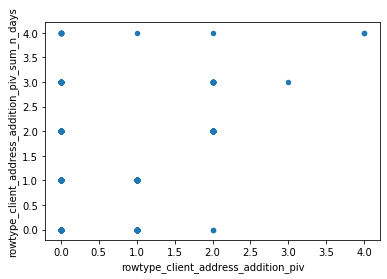

In [18]:
data3.plot.scatter(x='rowtype_client_address_addition_piv',y='rowtype_client_address_addition_piv_sum_n_days')
data3.loc[:,['rowtype_client_address_addition_piv','rowtype_client_address_addition_piv_sum_n_days']].corr()

In [19]:
data4=dataset.filter(regex=r'^medc_', axis=1)
data4.columns
#data4.describe()

Index(['medc_acqtype_1_piv', 'medc_acqtype_2_piv', 'medc_acqtype_3_piv',
       'medc_admintype_10_piv', 'medc_admintype_08_piv',
       'medc_admintype_09_piv', 'medc_admintype_04_piv',
       'medc_admintype_05_piv', 'medc_admintype_06_piv',
       'medc_admintype_07_piv', 'medc_admintype_11_piv',
       'medc_admintype_01_piv', 'medc_admintype_02_piv',
       'medc_admintype_03_piv', 'medc_levelofindependencetype_4_piv',
       'medc_levelofindependencetype_5_piv',
       'medc_levelofindependencetype_1_piv',
       'medc_levelofindependencetype_2_piv',
       'medc_levelofindependencetype_3_piv', 'medc_adminfreqid_1_piv',
       'medc_adminfreqid_2_piv', 'medc_adminfreqid_3_piv',
       'medc_adminfreqid_4_piv'],
      dtype='object')

In [20]:
count=[]
types=[1,2,3]
for i in range(numR):
    acq1=data4.loc[:,'medc_acqtype_1_piv']
    acq2=data4.loc[:,'medc_acqtype_2_piv']
    acq3=data4.loc[:,'medc_acqtype_3_piv']
    lst=[acq1[i]!=0,acq2[i]!=0,acq3[i]!=0]
    if True in lst:
        num=lst.index(True)
        count.append(types[num])
    else:
        count.append(0)
model['medc_acqtyp']=count 
model['medc_acqtyp'].value_counts()

0    122252
1      1837
2       190
3        14
Name: medc_acqtyp, dtype: int64

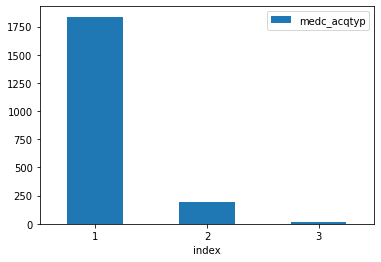

In [42]:
value_counts=model['medc_acqtyp'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df.plot.bar(x='index',y='medc_acqtyp',rot=0)

In [43]:
admintype=data4.loc[:,'medc_admintype_10_piv':'medc_admintype_03_piv']
adm=[]
typ=[10,8,9,4,5,6,7,11,1,2,3]
for i in range(numR):
    lst=[]
    row=list(admintype.iloc[i,:])
    if max(row)>0:
        num=row.index(max(row))
        adm.append(typ[num])
    else:
        adm.append(0)
print(len(adm))
model['medc_admintype']=adm
model['medc_admintype'].value_counts()         

124293


0     122252
1       1584
7        203
5         98
4         34
11        33
10        29
6         19
2         18
3         14
9          6
8          3
Name: medc_admintype, dtype: int64

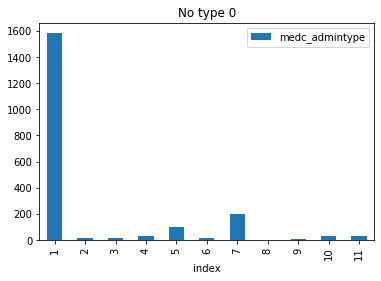

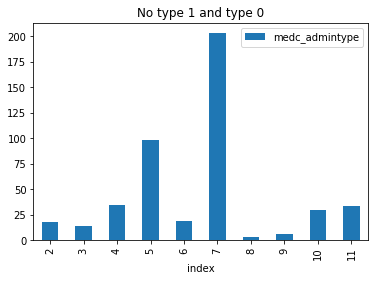

In [54]:
value_counts=model['medc_admintype'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df=df.sort_values(by=['index'])
df.plot.bar(x='index',y='medc_admintype',title='No type 0')
dfj=df.drop([1])
dfj.plot.bar(x='index',y='medc_admintype',title='No type 1 and type 0')

In [ ]:
if sum(row)==max(row): #this shows that each type only have 1 value for a Pk
        lst.append(0)
    else:
        lst.append(1)

In [55]:
levelofinde=data4.loc[:,'medc_levelofindependencetype_4_piv':'medc_levelofindependencetype_3_piv']
level=[]
typ=[4,5,1,2,3]
for i in range(numR):
    lst=[]
    row=list(levelofinde.iloc[i,:])
    if max(row)>0:
        num=row.index(max(row))
        level.append(typ[num])
    else:
        level.append(0)
model['medc_levelofindependencetype']=level
model['medc_levelofindependencetype'].value_counts()

0    122252
4      1642
3       136
1       114
5        82
2        67
Name: medc_levelofindependencetype, dtype: int64

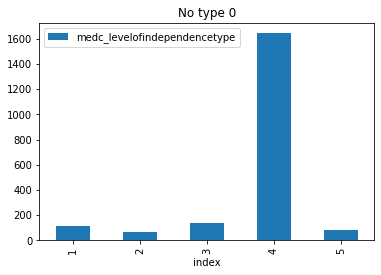

In [57]:
value_counts=model['medc_levelofindependencetype'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df=df.sort_values(by=['index'])
df.plot.bar(x='index',y='medc_levelofindependencetype',title='No type 0')

In [58]:
admfid=data4.loc[:,'medc_adminfreqid_1_piv':'medc_adminfreqid_4_piv']
ids=[]
typ=[1,2,3,4]
for i in range(numR):
    lst=[]
    row=list(admfid.iloc[i,:])
    if max(row)>0:
        num=row.index(max(row))
        ids.append(typ[num])
    else:
        ids.append(0)
model['medc_adminfreqid']=ids
model['medc_adminfreqid'].value_counts()

0    122252
3      1200
1       403
4       394
2        44
Name: medc_adminfreqid, dtype: int64

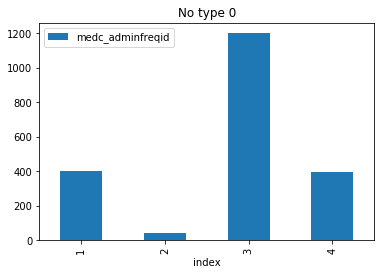

In [59]:
value_counts=model['medc_adminfreqid'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df=df.sort_values(by=['index'])
df.plot.bar(x='index',y='medc_adminfreqid',title='No type 0')

In [162]:
model.shape

(124293, 5)

In [61]:
data5=dataset.filter(regex=r'^status_', axis=1)
data5.dtypes

status_placement                  object
status_client_plan                object
status_rp_mechanical_restraint    object
status_rp_restricted_access       object
status_rp_chemical_restraint      object
status_rp_other                   object
dtype: object

In [62]:
levels={}
dicN={}
for name in data5.columns:
    value=data5.loc[:,name]
    lst=[]
    for v in value:
        if v not in lst:
            lst.append(v)
        levels[name]=[lst] # the name of levels of each object columns
        dicN[name]=len(lst) # number of levels of each object columns

In [63]:
dicN #from this result we can know that those attributes are factors with 3 or 2 levels

{'status_placement': 3,
 'status_client_plan': 3,
 'status_rp_mechanical_restraint': 2,
 'status_rp_restricted_access': 3,
 'status_rp_chemical_restraint': 3,
 'status_rp_other': 3}

In [64]:
levels # The levels of each attributes.

{'status_placement': [['placement_none',
   'placement_current',
   'placement_ended']],
 'status_client_plan': [['client_plan_none',
   'client_plan_current',
   'client_plan_ended']],
 'status_rp_mechanical_restraint': [['rp_mechanical_restraint_none',
   'rp_mechanical_restraint_current']],
 'status_rp_restricted_access': [['rp_restricted_access_none',
   'rp_restricted_access_current',
   'rp_restricted_access_ended']],
 'status_rp_chemical_restraint': [['rp_chemical_restraint_none',
   'rp_chemical_restraint_current',
   'rp_chemical_restraint_ended']],
 'status_rp_other': [['rp_other_none', 'rp_other_current', 'rp_other_ended']]}

In [66]:
data5['status_placement'].value_counts()

placement_none       111179
placement_current     10288
placement_ended        2826
Name: status_placement, dtype: int64

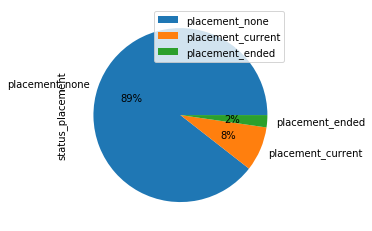

In [79]:
value_counts=data5['status_placement'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='status_placement',autopct='%1.0f%%',labels=lable)

In [77]:
data5['status_client_plan'].value_counts()

client_plan_none       71780
client_plan_current    50416
client_plan_ended       2097
Name: status_client_plan, dtype: int64

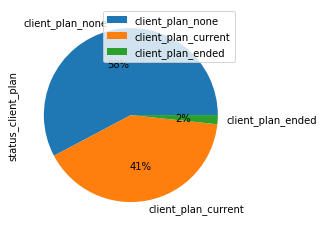

In [78]:
value_counts=data5['status_client_plan'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='status_client_plan',autopct='%1.0f%%',labels=lable)

In [80]:
data5['status_rp_mechanical_restraint'].value_counts()

rp_mechanical_restraint_none       124200
rp_mechanical_restraint_current        93
Name: status_rp_mechanical_restraint, dtype: int64

In [82]:
data5['status_rp_restricted_access'].value_counts()

rp_restricted_access_none       124226
rp_restricted_access_current        60
rp_restricted_access_ended           7
Name: status_rp_restricted_access, dtype: int64

In [84]:
data5['status_rp_chemical_restraint'].value_counts()

rp_chemical_restraint_none       122232
rp_chemical_restraint_current      1898
rp_chemical_restraint_ended         163
Name: status_rp_chemical_restraint, dtype: int64

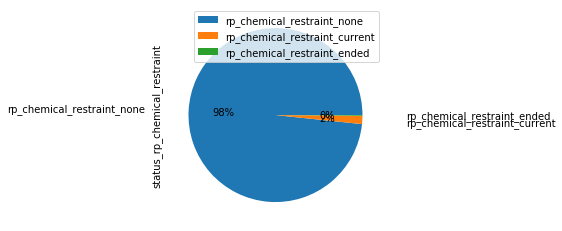

In [90]:
value_counts=data5['status_rp_chemical_restraint'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='status_rp_chemical_restraint',autopct='%1.0f%%',labels=lable,labeldistance=1.5)

In [91]:
data5[ 'status_rp_other'].value_counts()

rp_other_none       123988
rp_other_current       271
rp_other_ended          34
Name: status_rp_other, dtype: int64